### Nối Colab vô Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Đi đến thư mục chứa data

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

In [ ]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [ ]:
cd cats_and_dogs_filtered

In [ ]:
train_folder = './train'

In [ ]:
valid_folder = './validation'

### [1] Xây dựng mô hình Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator_train_data = ImageDataGenerator(rescale=1/255).flow_from_directory(
    train_folder,
    target_size=(150, 150),
    color_mode = 'rgb',
    batch_size=32,
    class_mode='binary'
)
generator_valid_data = ImageDataGenerator(rescale=1/255).flow_from_directory(
    valid_folder,
    target_size=(150, 150),
    color_mode = 'rgb',
    batch_size=32,
    class_mode='binary'
)

### [2] Thực hiện training

In [ ]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>DESIRED_ACCURACY):
            print("\nReached 70% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit_generator(
    # callbacks=[callbacks],
    generator=generator_train_data,
    steps_per_epoch=8,
    epochs=32,
    verbose=1,
    validation_data=generator_valid_data,
    validation_steps=8
)

### [3] Thực hiện load file và dự đoán

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for file in upload.keys():
    path = './' + file
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=16)
    print(classes[0])
    if classes[0] >= 0.5:
        print(file + ' is a cat')
    else:
        print(file + ' is a dog')

### Hiển thị độ chính xác của mô hình

Text(0.5, 1.0, 'Training and validation loss')

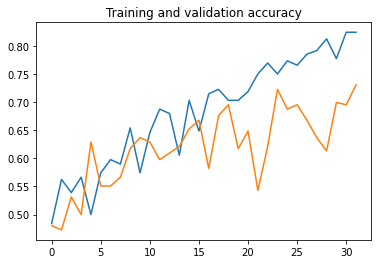

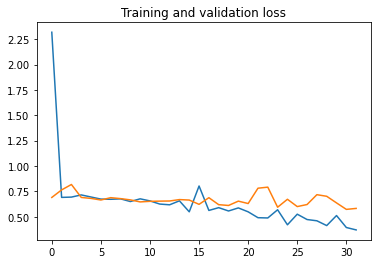

In [13]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )